# Actividad 9: Análisis de texto y Word Cloud

En este notebook se genera una nube de palabras a partir de texto libre (tweets) para analizar los términos más frecuentes.

Dataset: Tweets.csv
Columna usada: text


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [2]:
# Asegúrate de tener el archivo 'Tweets.csv' en la misma carpeta
df = pd.read_csv('Tweets.csv')
df.columns = df.columns.str.strip()
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
# Confirmamos el nombre de la columna
print(df.columns)

# Si es necesario, renómbrala
df.rename(columns={'text': 'Texto'}, inplace=True)


Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [4]:
# Convertir a minúsculas, eliminar nulos
texto = df['Texto'].dropna().str.lower().str.cat(sep=' ')
print(f"Número de palabras totales: {len(texto.split())}")


Número de palabras totales: 258446


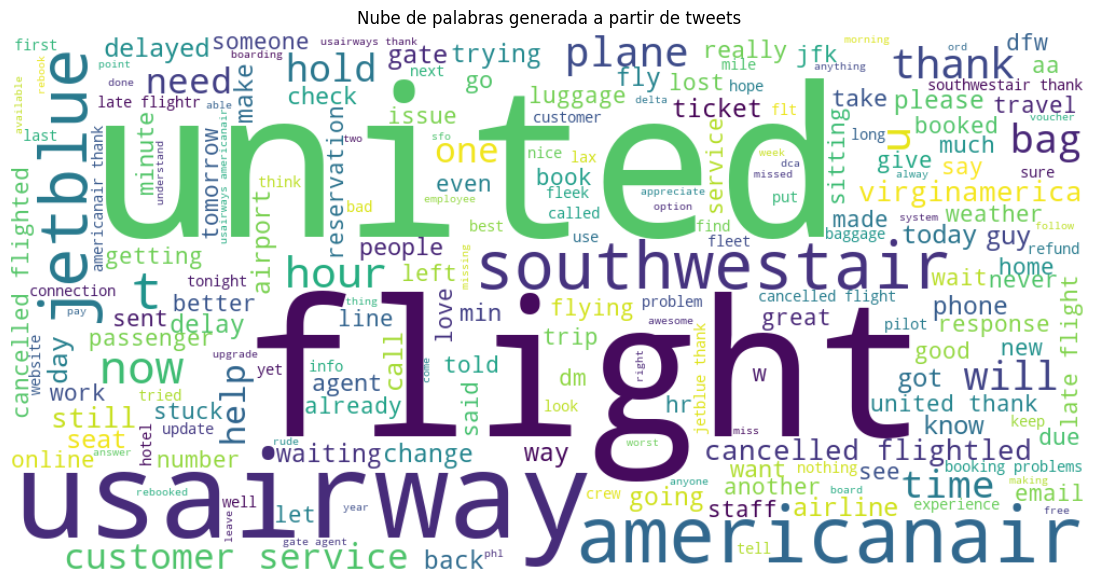

In [5]:
# Stopwords en inglés (puedes agregar más si lo deseas)
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'amp'])

# Crear la nube de palabras
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis'
).generate(texto)

# Mostrarla
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras generada a partir de tweets')
plt.show()


## Conclusión

Se generó una nube de palabras que permite visualizar los términos más comunes en los tweets analizados.  
Este tipo de visualización es útil para identificar temas clave, patrones de lenguaje o análisis de sentimiento más profundo.

Se recomienda limpiar aún más el texto con herramientas como `nltk` o `spaCy` para eliminar menciones, hashtags y puntuación.
